In [1]:
import os
import warnings
warnings.filterwarnings("ignore")
import numpy as np 
import pandas as pd 
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
#%matplotlib inline

In [2]:
print(os.getcwd())
os.chdir('/Users/liuyang/Desktop/Springboard_Capstone3') 
print(os.getcwd())

/Users/liuyang/Desktop/Springboard_Capstone3/Notebook
/Users/liuyang/Desktop/Springboard_Capstone3


In [3]:
df = pd.read_csv('data/train.csv')

In [4]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
df.shape

(1017209, 9)

In [6]:
df = df.sort_values(['Date', 'Store'], ascending=True)

In [7]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1016095,1,2,2013-01-01,0,0,0,0,a,1
1016096,2,2,2013-01-01,0,0,0,0,a,1
1016097,3,2,2013-01-01,0,0,0,0,a,1
1016098,4,2,2013-01-01,0,0,0,0,a,1
1016099,5,2,2013-01-01,0,0,0,0,a,1


In [8]:
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '/Users/liuyang/Desktop/Springboard_Capstone3/notebook')
# os.chdir('/Users/liuyang/Desktop/Springboard_Capstone3/notebook') 
import eda

In [9]:
from eda import data_process, Sales_EDA, sumby, individual_store, combined_storedata, combined_store_EDA

In [10]:
df_process = data_process(df)

In [11]:
df_process.convert_datetime('Date')

In [12]:
df_process.data_info()

,column,counts,unique_value_pct,nan_pct,data_type
3,Sales,21734,2.1366,0.0,int64
4,Customers,4086,0.4017,0.0,int64
0,Store,1115,0.1096,0.0,int64
2,Date,942,0.0926,0.0,datetime64[ns]
1,DayOfWeek,7,0.0007,0.0,int64
7,StateHoliday,5,0.0005,0.0,object
5,Open,2,0.0002,0.0,int64
6,Promo,2,0.0002,0.0,int64
8,SchoolHoliday,2,0.0002,0.0,int64


In [13]:
df.StateHoliday.value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [14]:
df_process.str_to_int('StateHoliday')

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
StateHoliday,1017209.0,0.030525,0.172026,0.0,0.0,0.0,0.0,1.0
SchoolHoliday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0


In [16]:
period_days = len(set(df.Date))
period_weeks = len(df.set_index('Date').groupby('Date').resample('w'))
numberOfstore = len(set(df.Store))

print(f'Data contains data of {numberOfstore} stores')
print(f'Data contains data of {period_days} days ({df.Date.min()} ~ {df.Date.max()})')
print(f'Data contains data of {period_weeks} weeks')

Data contains data of 1115 stores
Data contains data of 942 days (2013-01-01 00:00:00 ~ 2015-07-31 00:00:00)
Data contains data of 135 weeks


## Overall Distribution

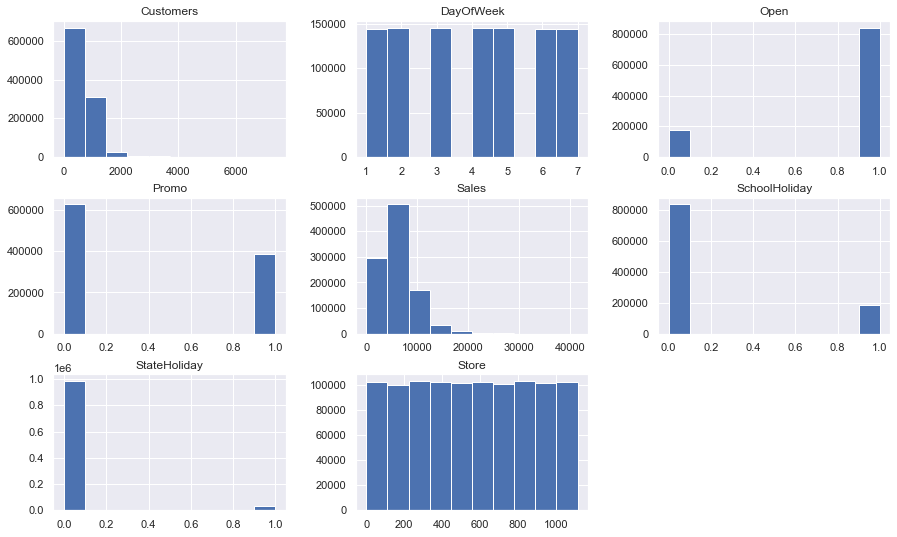

In [17]:
fig ,ax = plt.subplots(figsize=(15,9))
df.hist(ax=ax)
plt.show()

# Daily Sales and Customers

In [18]:
df[['Sales', 'Customers']].describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0


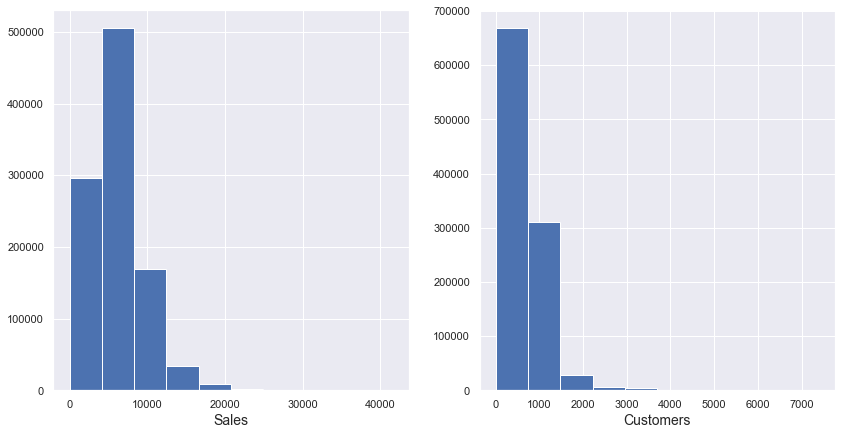

In [19]:
# Distributio for daily sales and daily customers
plt.figure(figsize=(14,7))
for index, col in enumerate(['Sales', 'Customers'],1):
    plt.subplot(1,2,index)
    plt.hist(df[col])
    plt.xlabel(col, fontsize=14)

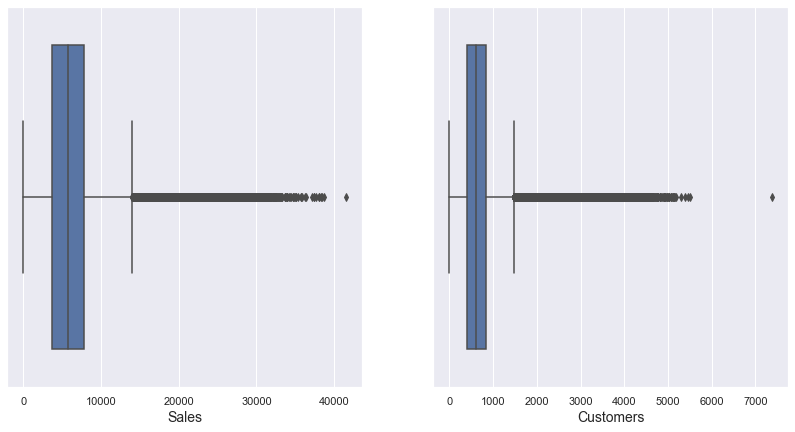

In [20]:
# boxplot for daily sales and daily customers
plt.figure(figsize=(14,7))
for index, col in enumerate(['Sales', 'Customers'],1):
    plt.subplot(1,2,index)
    sns.boxplot(df[col])
    plt.xlabel(col, fontsize=14)

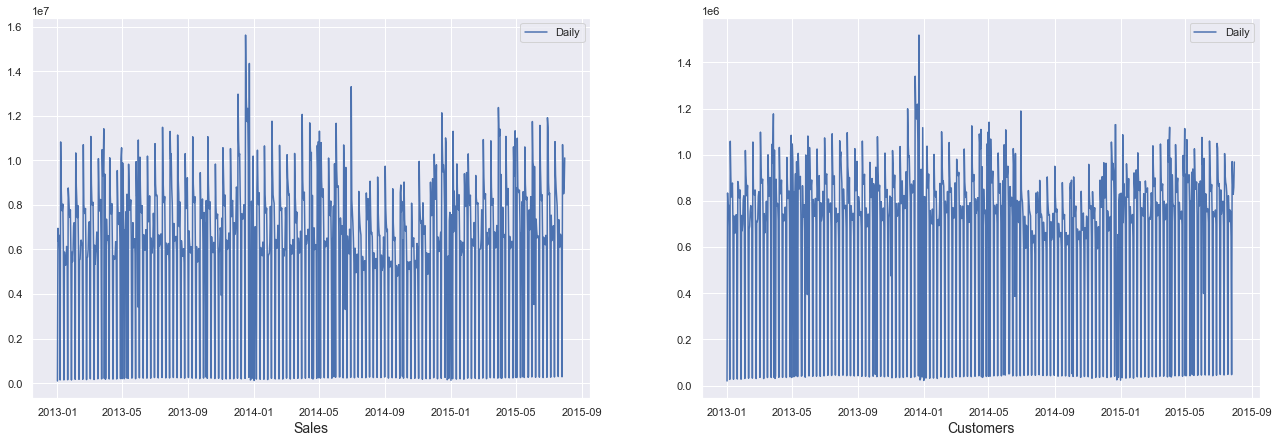

In [81]:
#plot sum of daily sales and sum of customers line plot
plt.figure(figsize=(22,7))
for index, col in enumerate(['Sales', 'Customers'],1):
    plt.subplot(1,2,index)
    plt.plot(df.set_index('Date').groupby('Date')[col].sum(), label='Daily')
    plt.xlabel(col, fontsize=14)
    plt.legend()

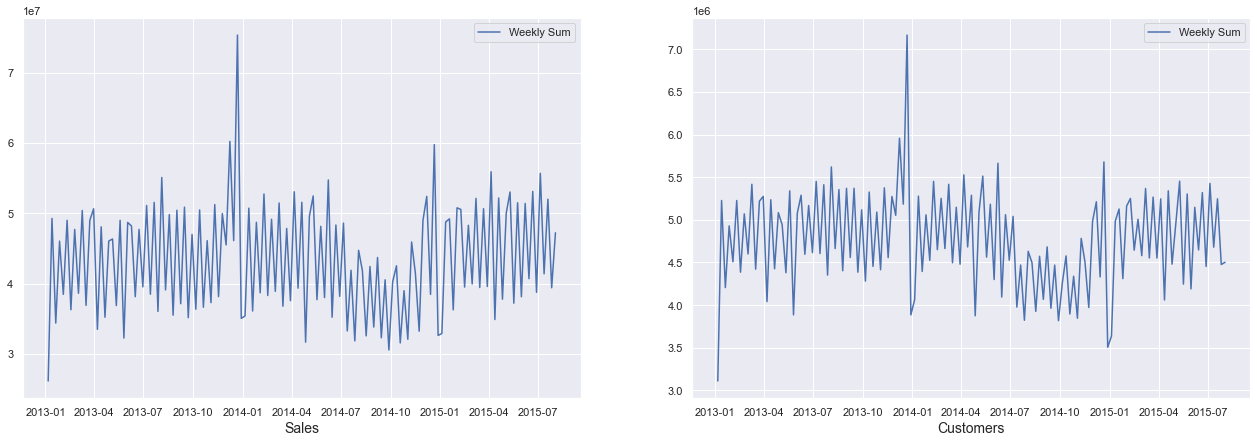

In [22]:
#plot weekly sales and customers line plot
plt.figure(figsize=(22,7))
for index, col in enumerate(['Sales', 'Customers'],1):
    plt.subplot(1,2,index)
    plt.plot(df.set_index('Date').resample('w')[col].sum(), label='Weekly Sum')   
    plt.xlabel(col, fontsize=14)
    plt.legend()


## We can see daily sales and daily customers fluctuate together, we will focus on sales analysis in this study

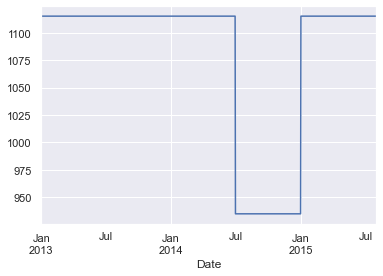

Number of store that were closed for renovation: 180


In [23]:
df.groupby('Date').Open.count().plot()
plt.show()
closedstores = df.groupby('Date').Open.count().max() - df.groupby('Date').Open.count().min()
print(f'Number of store that were closed for renovation: {closedstores}')

#### We can see there's a big decline in sales during 2014-07-01 ~ 2014-12-31 as 180 stores were closed due to refurbishment

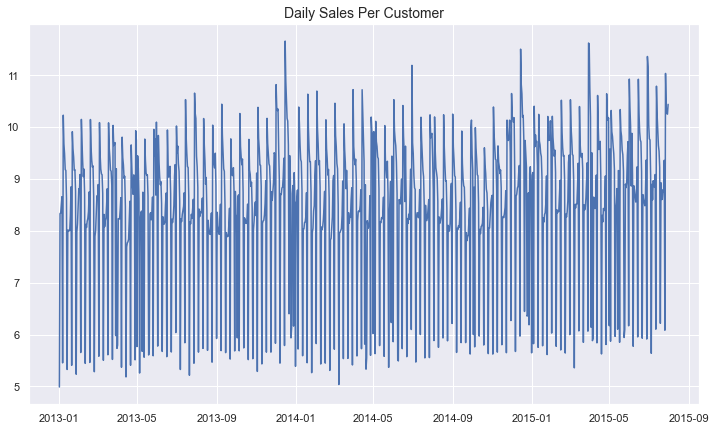

In [24]:
plt.figure(figsize=(12,7))
plt.plot(df.groupby('Date')['Sales'].sum()/df.groupby('Date')['Customers'].sum())
plt.title('Daily Sales Per Customer', fontsize=14)
plt.show()

In [25]:
# add year, moth to dataframe
df['Month'] = df['Date'].map(lambda x: x.month)
df['Year'] = df['Date'].map(lambda x: x.year)
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,Year
1016095,1,2,2013-01-01,0,0,0,0,1,1,1,2013
1016096,2,2,2013-01-01,0,0,0,0,1,1,1,2013
1016097,3,2,2013-01-01,0,0,0,0,1,1,1,2013
1016098,4,2,2013-01-01,0,0,0,0,1,1,1,2013
1016099,5,2,2013-01-01,0,0,0,0,1,1,1,2013


## Sales by Year

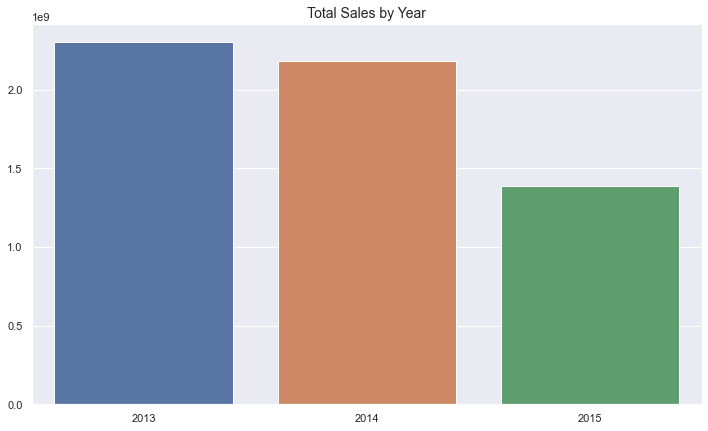

In [26]:
plt.rcParams['figure.figsize'] = (12, 7)
sns.barplot(y=df.groupby('Year').Sales.sum().values, x=df.Year.unique().astype('str'), 
            order= df.Year.unique().astype('str') )
plt.title('Total Sales by Year', fontsize=14)
plt.show()

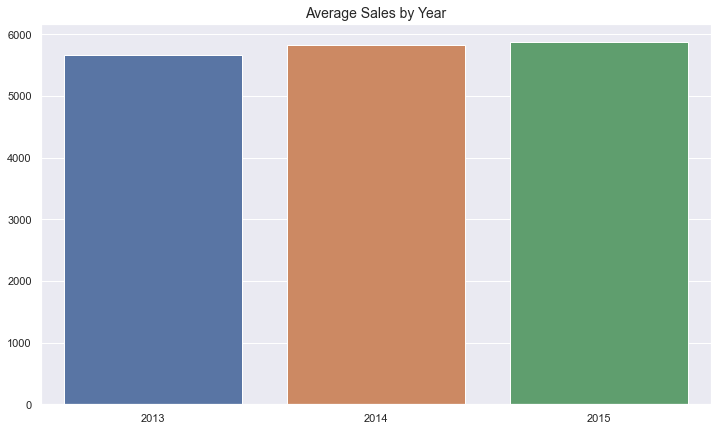

In [27]:
plt.rcParams['figure.figsize'] = (12, 7)
sns.barplot(y=df.groupby('Year').Sales.mean().values, x=df.Year.unique().astype('str'), 
            order= df.Year.unique().astype('str') )
plt.title('Average Sales by Year', fontsize=14)
plt.show()

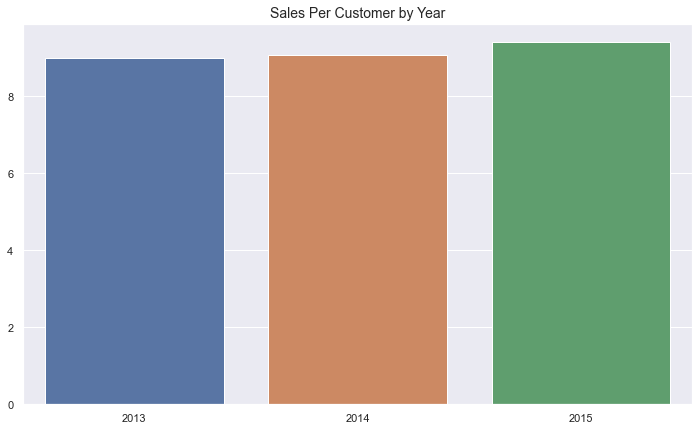

In [28]:
sns.barplot(y=df.groupby('Year').Sales.mean().values/df.groupby('Year').Customers.mean().values, x=df.Year.unique().astype('str'), 
            order= df.Year.unique().astype('str') )
plt.title('Sales Per Customer by Year', fontsize=14)
plt.show()

## Sales by Month

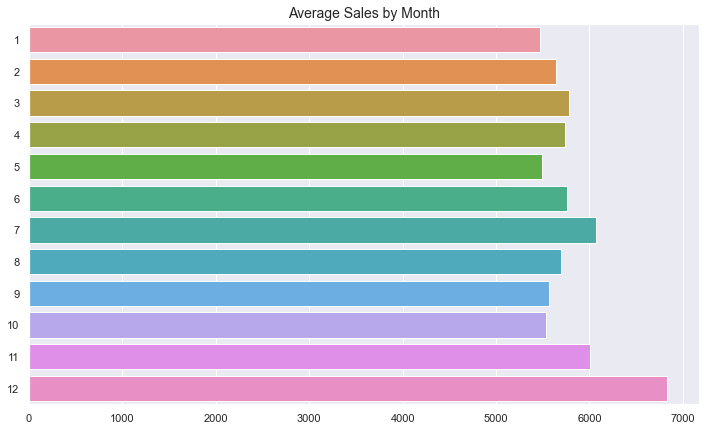

In [29]:
sns.barplot(x=df.groupby('Month').Sales.mean().values, y=df.Month.unique().astype('str'), 
            order= df.Month.unique().astype('str') , orient='h')
plt.title('Average Sales by Month', fontsize=14)
plt.show()

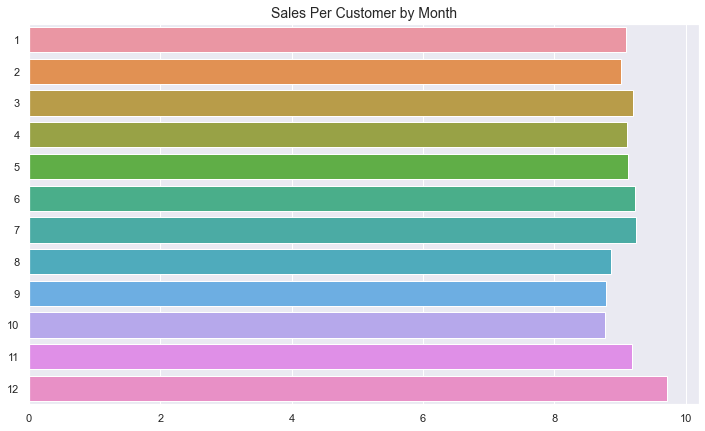

In [30]:
sns.barplot(x=df.groupby('Month').Sales.mean().values/df.groupby('Month').Customers.mean().values, y=df.Month.unique().astype('str'), 
            order= df.Month.unique().astype('str') , orient='h')
plt.title('Sales Per Customer by Month', fontsize=14)
plt.show()

## Sales by Day of Week

In [31]:
pd.pivot_table(df, index='DayOfWeek', aggfunc='sum').drop(['Store', 'Year'], axis=1)

,Customers,Month,Open,Promo,Sales,SchoolHoliday,StateHoliday
DayOfWeek,,,,,,,
1,117675012,854985,137560,77760,1130203012,34060,6999
2,110848063,858184,143961,77580,1020411930,36595,1423
3,105117642,850200,141936,77580,954962863,34636,3495
4,101732938,842325,134644,77580,911177709,34747,11349
5,108384820,847720,138640,77580,980555941,36235,7076
6,95103854,844195,144058,0,846317735,2724,399
7,5179426,849770,3593,0,29551433,2724,309


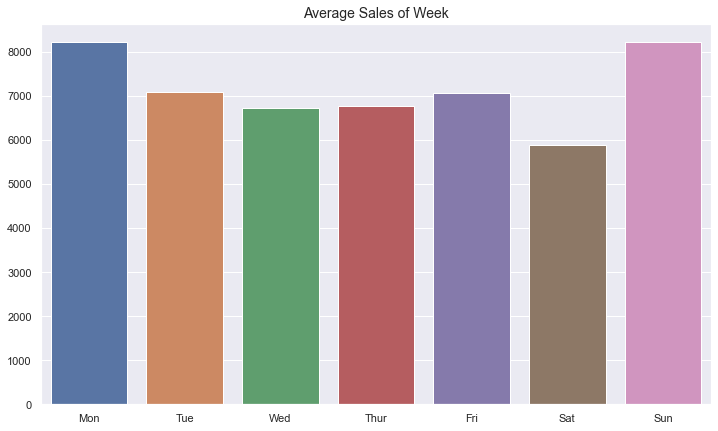

In [32]:
sns.barplot(x=['Mon', 'Tue','Wed', 'Thur', 'Fri', 'Sat', 'Sun'],
y=pd.pivot_table(df, index='DayOfWeek', aggfunc='sum')['Sales']/pd.pivot_table(df, index='DayOfWeek', aggfunc='sum')['Open'])
plt.title('Average Sales of Week', fontsize=14)
plt.show()

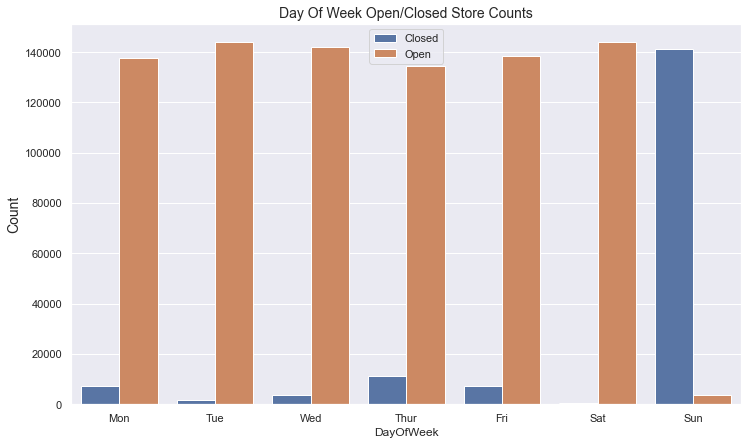

In [33]:
ax=sns.countplot(x='DayOfWeek', hue='Open', data=df)
ax.set_xticklabels(['Mon', 'Tue','Wed', 'Thur', 'Fri', 'Sat', 'Sun'])
ax.legend(['Closed','Open'])
ax.set_title('Day Of Week Open/Closed Store Counts', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
plt.show()

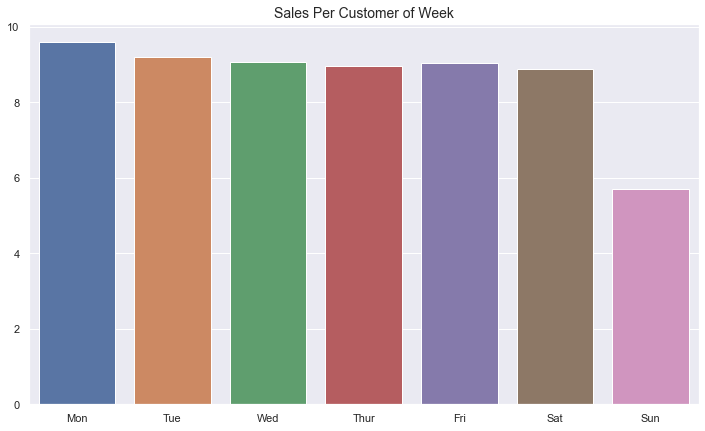

In [34]:
sns.barplot(x=['Mon', 'Tue','Wed', 'Thur', 'Fri', 'Sat', 'Sun'],
y=df.groupby('DayOfWeek')['Sales'].mean()/df.groupby('DayOfWeek')['Customers'].mean())
plt.title('Sales Per Customer of Week', fontsize=14)
plt.show()

In [35]:
# def histplot_mean_median(data, col):
#     data[col].hist()
#     per50 = data[col].describe()['50%']
#     mean = data[col].describe()['mean']
#     plt.axvline(per50,color='r')
#     plt.axvline(mean, color='r', linestyle='-.')
#     plt.legend(['median', 'mean'])

#     plt.title(f'Daily {col} Distribution', fontsize=15)
#     plt.show()

In [36]:
# # check daily sales of 1115 stores over 942 days
# plt.rcParams['figure.figsize'] = (12, 7)
# histplot_mean_median(df, 'Sales')

# sns.boxplot(x=df.Sales)
# plt.title('Daily Sales', fontsize=15)
# plt.show()

## Check the Details of Daily Sales Outlier

In [37]:
df.loc[df.Sales.idxmax()]

Store                            909
DayOfWeek                          1
Date             2015-06-22 00:00:00
Sales                          41551
Customers                       1721
Open                               1
Promo                              0
StateHoliday                       0
SchoolHoliday                      0
Month                              6
Year                            2015
Name: 44393, dtype: object

Store 909 open days: 607
Store 909 closed days: 151


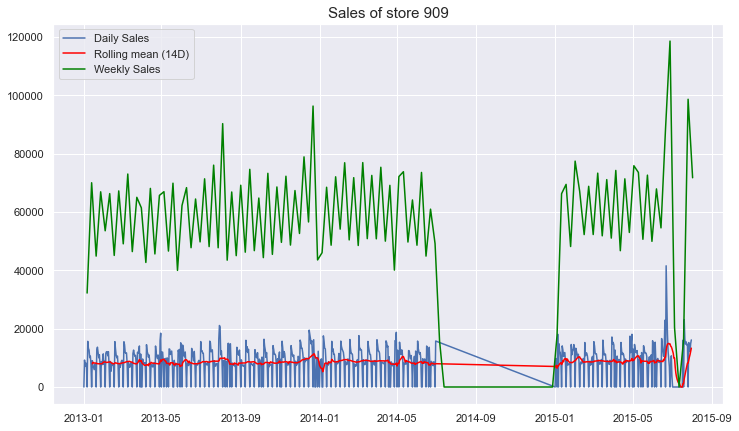

In [38]:
# check store open days and sales plot for store 909
storeid=909
store909 = individual_store(df, 'Date', storeid)

store909.store_opendays()
store909.lineplot('Sales')

We can see the sales peak happens at 2015-06-22.
By analyzing the sales plot of store 909 we can see the peak was just an one time exception.

## Check the Details of Daily Customers outlier

In [39]:
# # check daily customers of 1115 stores over 942 days
# histplot_mean_median(df, 'Customers')

# plt.show()

In [40]:
# check the details of daily customers outlier
df.loc[df.Customers.idxmax()]

Store                            817
DayOfWeek                          2
Date             2013-01-22 00:00:00
Sales                          27190
Customers                       7388
Open                               1
Promo                              1
StateHoliday                       0
SchoolHoliday                      0
Month                              1
Year                            2013
Name: 993496, dtype: object

Store 817 open days: 784
Store 817 closed days: 158


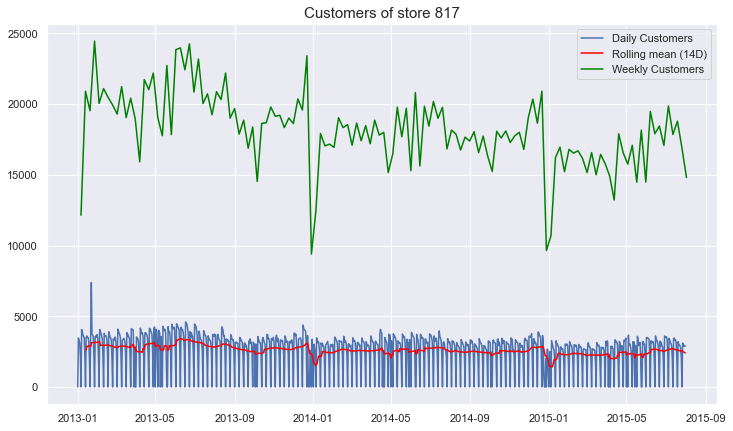

In [41]:
# check the customer line plot for store 817
storeid=817
store817 = individual_store(df, 'Date',storeid)
store817.store_opendays()
store817.lineplot('Customers')

We can see the peak of customer happens at 2013-01-22. By analyzing the customer plot of store 817 we can see the peak was just an one time exception.

## 942 Days Sum up by Store

In [42]:
sumsales_by_store = sumby(df, 'Store', 'Sales')
sumscustomers_by_store = sumby(df, 'Store', 'Customers')

In [43]:
#alldata = totalby(df, 'Date', 'Customers')

In [44]:
#alldata.total_by()

In [45]:
# make a dataframe contains sum up sales and total sales shares for each store over 942 days
# sorted in descending order
sumsales_by_store.get_sum_pct()

,Store,Sales,pct
0,262,19516842,0.332304
1,817,17057867,0.290437
2,562,16927322,0.288214
3,1114,16202585,0.275874
4,251,14896870,0.253642
...,...,...,...
1110,263,2306075,0.039264
1111,208,2302052,0.039196
1112,198,2268273,0.038621
1113,543,2179287,0.037106


In [46]:
# statistic summary of total sales and shares of each store over 942 days
sumsales_by_store.get_sum_pct().describe()

,Store,Sales,pct
count,1115.00000,1.115000e+03,1115.000000
mean,558.00000,5.267427e+06,0.089686
std,322.01708,1.951304e+06,0.033224
min,1.00000,2.114322e+06,0.036000
25%,279.50000,3.949377e+06,0.067244
50%,558.00000,4.990259e+06,0.084967
75%,836.50000,6.084148e+06,0.103592
max,1115.00000,1.951684e+07,0.332304


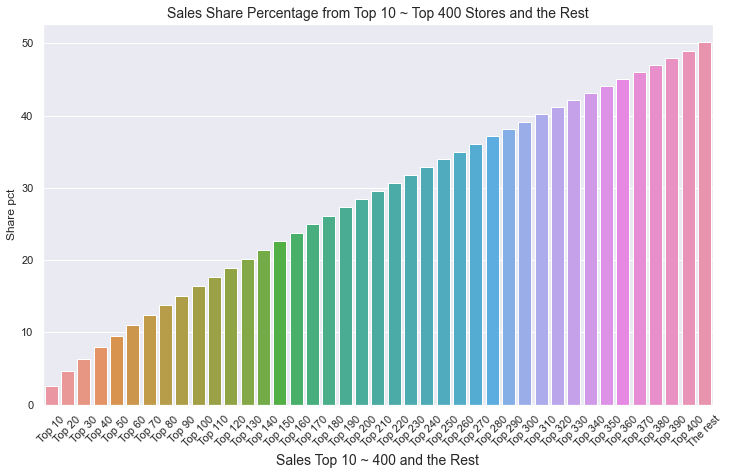

In [47]:
# create dataframe to calculate sales share from top 10 ~ top 400 store 

plt.rcParams['figure.figsize'] = (12, 7)
top400share = []
for i in np.arange(10,410,10):
    top400share.append(sumsales_by_store.get_sum_pct()[:i].pct.sum())
top400share.append(sumsales_by_store.get_sum_pct()[410:].pct.sum())

indexlist = []
for i in np.arange(10, 410, 10):
    indexlist.append(f'Top {i}')
indexlist.append('The rest')
top400share=pd.DataFrame(top400share, index=indexlist, columns=['Share pct'])


# plot barplot
sns.barplot(x=top400share.index, y=top400share['Share pct'])
plt.xlabel('Sales Top 10 ~ 400 and the Rest', fontsize=14)
plt.title('Sales Share Percentage from Top 10 ~ Top 400 Stores and the Rest', fontsize=14)
plt.xticks(rotation=45)
plt.show()
      

In [48]:
# topp 400 store sales share and the share of the rest stores
top400share

,Share pct
Top 10,2.611955
Top 20,4.599750
Top 30,6.377886
Top 40,8.025247
Top 50,9.530700
Top 60,10.968924
Top 70,12.377994
Top 80,13.747727
Top 90,15.087428
Top 100,16.388890


In [49]:
# get the sum of sales and share of top 10 stores over 942 day
sumsales_by_store.topN_sum_share(400)

Top 400 Store Total Sales: 2873011305.0
Top 400 Store Total Sales Share in All Stores: 48.917%


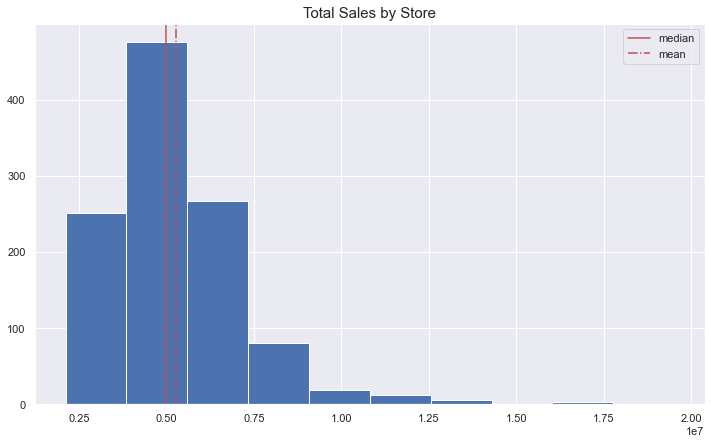

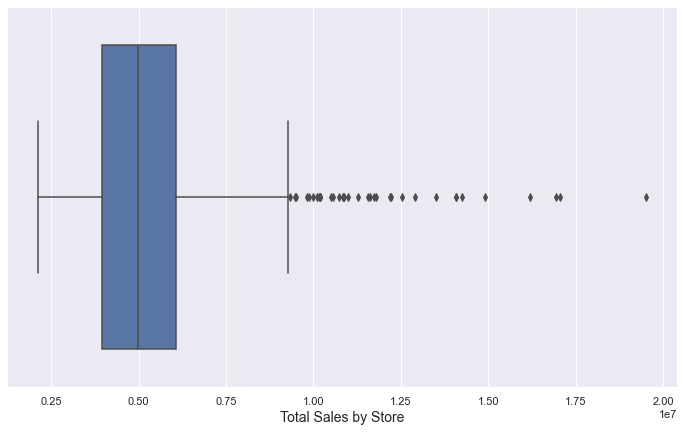

In [50]:
# check distribution of sum up sales over 942 days of 1115 stores
plt.rcParams['figure.figsize'] = (12, 7)
sumsales_by_store.histgram('Sales')

sns.boxplot(x=sumsales_by_store.get_sum_pct().Sales)
plt.xlabel('Total Sales by Store', fontsize=14)
plt.show()

## Sum up Sales Barplot of Top 10 Stores over 942 Days

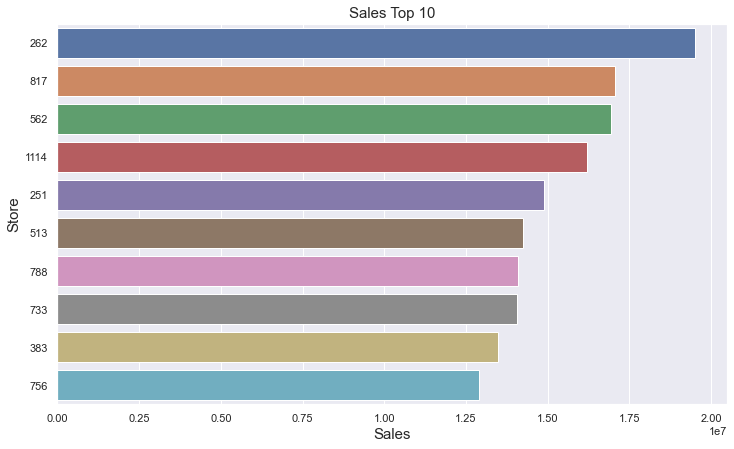

In [51]:
# Top 10 total sales
sumsales_by_store.topN_barplot(10, 'Sales')

## Daily Sales barplot of Total Sales Top 10 Stores

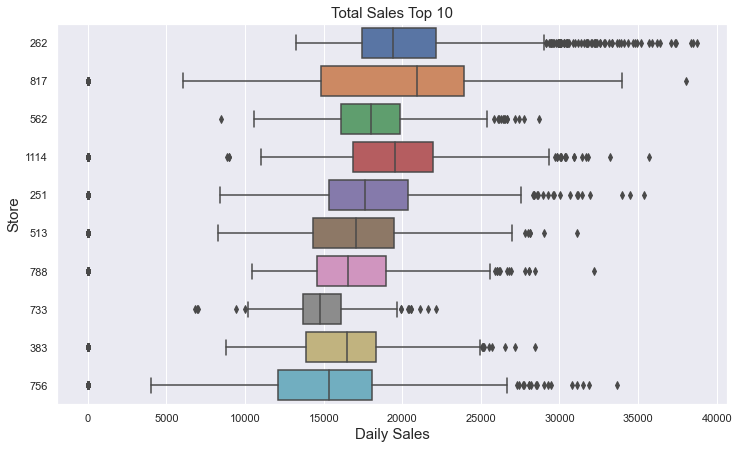

In [52]:
# check daily sales of Top 10 stores 
sales_by_store= Sales_EDA(df)
sales_by_store.topN_daily_boxplot(10)

### Add 3 new metrics: AverageDailySales, AverageDailyCustomer, SalesPerCustomer 

In [53]:
store_sum = df_process.pivot_table('Store', 'sum')
store_sum['AverageDailySales'] = store_sum['Sales']/store_sum['Open']
store_sum['AverageDailyCustomer'] = store_sum['Customers']/store_sum['Open']
store_sum['SalesPerCustomer'] = store_sum['Sales']/store_sum['Customers']

In [54]:
store_sum = store_sum.sort_values('Sales', ascending=False).drop(['DayOfWeek', 'Month', 'Year'], axis=1)

## Average Daily Sales

In [55]:
store_sum.describe().T

,count,mean,std,min,25%,50%,75%,max
Customers,1115.0,5.776159e+05,3.046545e+05,1.875830e+05,4.053910e+05,5.092330e+05,6.715440e+05,3.206058e+06
Open,1115.0,7.573022e+02,6.386113e+01,5.920000e+02,7.760000e+02,7.790000e+02,7.820000e+02,9.420000e+02
Promo,1115.0,3.480538e+02,2.723916e+01,2.860000e+02,3.600000e+02,3.600000e+02,3.600000e+02,3.600000e+02
Sales,1115.0,5.267427e+06,1.951304e+06,2.114322e+06,3.949377e+06,4.990259e+06,6.084148e+06,1.951684e+07
SchoolHoliday,1115.0,1.629785e+02,2.046772e+01,1.240000e+02,1.550000e+02,1.700000e+02,1.720000e+02,2.090000e+02
StateHoliday,1115.0,2.784753e+01,2.495252e+00,2.300000e+01,2.500000e+01,2.900000e+01,2.900000e+01,3.200000e+01
AverageDailySales,1115.0,6.934208e+03,2.383911e+03,2.703737e+03,5.322300e+03,6.589948e+03,7.964201e+03,2.175748e+04
AverageDailyCustomer,1115.0,7.545102e+02,3.533444e+02,2.401831e+02,5.414687e+02,6.786675e+02,8.662033e+02,3.403459e+03
SalesPerCustomer,1115.0,9.643756e+00,1.986858e+00,3.513703e+00,8.131856e+00,9.464061e+00,1.098117e+01,1.616264e+01


In [56]:
storesum_sales_eda = Sales_EDA(store_sum.reset_index())
storesum_averageS = sumby(store_sum.reset_index(), 'Store', 'AverageDailySales')

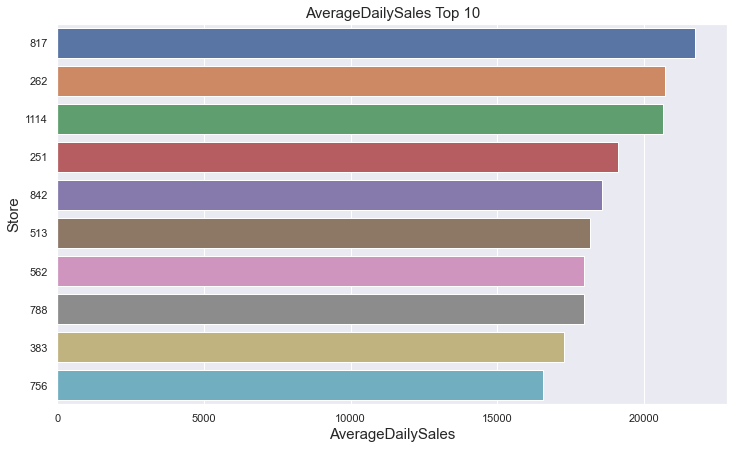

In [57]:
# plot 10 stores with the highest avarege daily sales
storesum_averageS.topN_barplot(10, 'AverageDailySales')

## Daily Sales boxplot of Top 10 AvergeDailySales

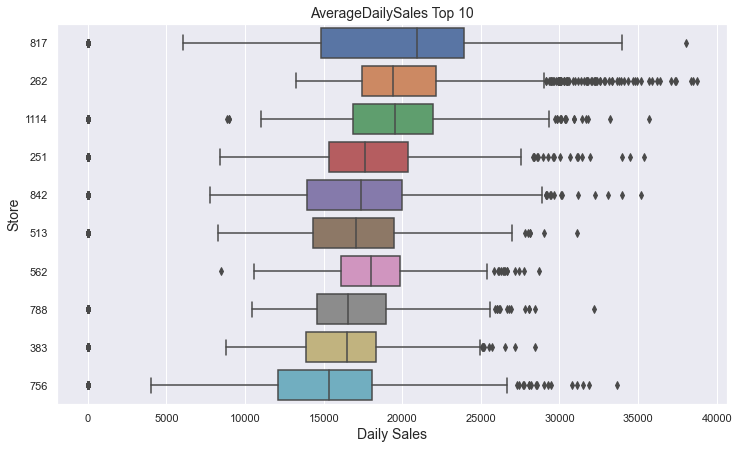

In [58]:
#storesum_saleseda.topN_daily_boxplot(10)

plt.figure(figsize=(12, 7))
b_N_data = df.loc[df.Store.isin(store_sum.AverageDailySales.nlargest(10).index)]
sns.boxplot(x='Sales', y='Store',
               data=b_N_data, order=store_sum.AverageDailySales.nlargest(10).index,
               orient='h')
plt.title('AverageDailySales Top 10', fontsize =14)
plt.ylabel('Store', fontsize=14)
plt.xlabel('Daily Sales', fontsize=14)
plt.show()

## Sales Per Customer 

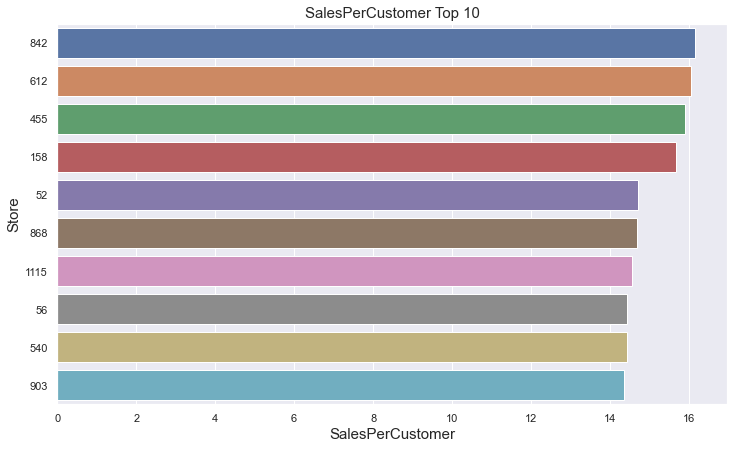

In [59]:
storesum_averageC = sumby(store_sum.reset_index(), 'Store', 'SalesPerCustomer')
storesum_averageC.topN_barplot(10, 'SalesPerCustomer')

In [60]:
# ax=sns.barplot(x=store_sum.AverageDailySales.nlargest(10), y=store_sum.AverageDailySales.nlargest(10).index,
#            order=store_sum.AverageDailySales.nlargest(10).index, orient='h')
# ax.axvline(store_sum.AverageDailySales.describe()['75%'], color='red', linestyle='--')

In [61]:
# check sales per customer ranking of top 10 average daily sales store
for i in store_sum.AverageDailySales.nlargest(10).index: 
    print(i, store_sum.sort_values('SalesPerCustomer', ascending=False).reset_index().loc[store_sum.sort_values('SalesPerCustomer', ascending=False).reset_index().Store==i].index[0])

817 1048
262 1098
1114 1080
251 918
842 0
513 716
562 1102
788 366
383 908
756 1037


# Note: If we can increase the spend per customer for these top 10 stores, the impact on increasing averagedaily sales will be big.


In [62]:
# plot 10 stores with the highest avarege daily sales

# sns.barplot(y=store_sum.AverageDailySales.nlargest(10).index,
#             x=store_sum.AverageDailySales.nlargest(10).values,
#             order = store_sum.AverageDailySales.nlargest(10).index,
#            orient='h')

# plt.title('Average Daily Sales Top 10 Store', fontsize=15)
# plt.xlabel('AverageDailySales', fontsize=15)
# plt.ylabel('Store', fontsize=15)
# plt.show()

In [63]:
# # check the ranking of sales per customer of store 262, store 817
# newstoredata.SalesPerCustomer[261]
# print(sorted(newstoredata.SalesPerCustomer).index(newstoredata.SalesPerCustomer[261]))

# newstoredata.SalesPerCustomer[816]
# print(sorted(newstoredata.SalesPerCustomer).index(newstoredata.SalesPerCustomer[816]))

# newstoredata.SalesPerCustomer[1113]
# print(sorted(newstoredata.SalesPerCustomer).index(newstoredata.SalesPerCustomer[1113]))

In [64]:
# set(sales_by_store.nlargest_ID(10)).difference(set(store_sum.AverageDailySales.nlargest(10).index))

# set(store_sum.AverageDailySales.nlargest(10).index).difference(set(sales_by_store.nlargest_ID(10)))

In [65]:
# ## Customers

# # check distribution of sum up sales over 942 days of 1115 stores
# sumscustomers_by_store.histgram('Customers')

# sns.boxplot(x=sumscustomers_by_store.get_sum_pct().Customers)
# plt.show()

# ## Average Daily Customers 

# storesum_averageC = sumby(store_sum.reset_index(), 'Store', 'AverageDailyCustomer')
# storesum_averageC.topN_barplot(10, 'AverageDailyCustomer')

# plt.figure(figsize=(12, 7))
# b_N_data = df.loc[df.Store.isin(store_sum.AverageDailyCustomer.nlargest(10).index)]
# sns.boxplot(x='Sales', y='Store',
#                data=b_N_data, order=store_sum.AverageDailyCustomer.nlargest(10).index,
#                orient='h')
# plt.title('AverageDailyCustomer Top 10', fontsize =14)
# plt.ylabel('Store', fontsize=14)
# plt.xlabel('Daily Customers', fontsize=14)
# plt.show()

# ## Stores that ranked in both Top 10 AverageDailySales and Top 10 AverageDailyCustomer are: 262, 817, 1114, 251, 562

## Weekly Total Sales

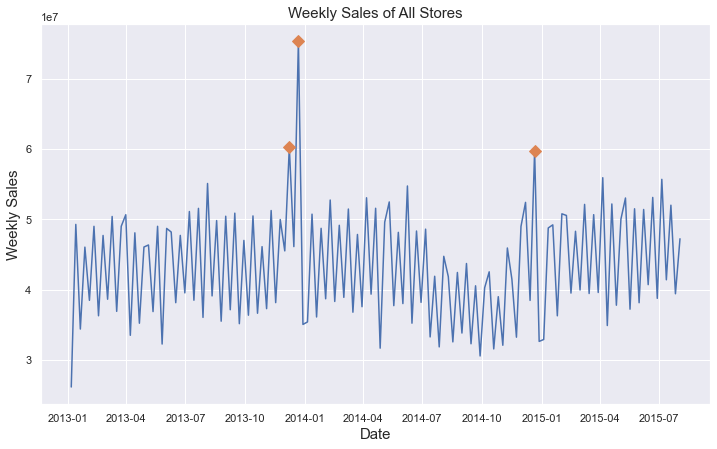

Three peaks happens at: 
 Date
2013-12-22    75371329
2013-12-08    60241244
2014-12-21    59780187
Name: Sales, dtype: int64


In [66]:
markers= df_process.pivot_table('Date', 'sum').resample('w').Sales.sum().nlargest(3)
weeklytotalsales = df_process.pivot_table('Date', 'sum').resample('w').Sales.sum()

plt.figure(figsize=(12, 7))
plt.plot(weeklytotalsales.index, weeklytotalsales.values)
plt.plot(markers.index, markers.values, "D", markersize=8)
plt.title('Weekly Sales of All Stores', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Weekly Sales', fontsize=15)
plt.show()

print(f'Three peaks happens at: \n {markers}')

#### From the weekly sales sum up by all stores, We can see the 3 peaks happens at 12-08 ~ 12-22 week in both 2013 and 2014, which is around christmas season. Therefore we assume this trend also exist in individual store. 

## Plot the number of daily open stores over 942 days

## Check Weekly Sales Plot for Top 3 and Bottom 3 Stores

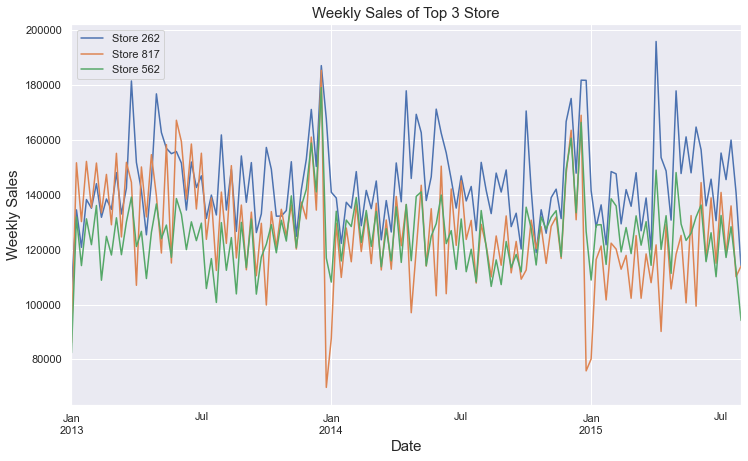

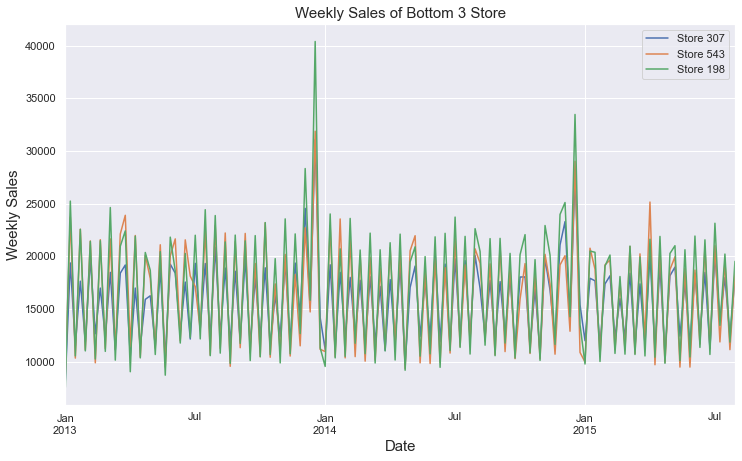

In [67]:
sales_by_store.topN_weekly_salesplot(3)
sales_by_store.bottomN_weekly_salesplot(3)

## Check Weekly Sales Plot for Top 10 and Bottom 10 Stores

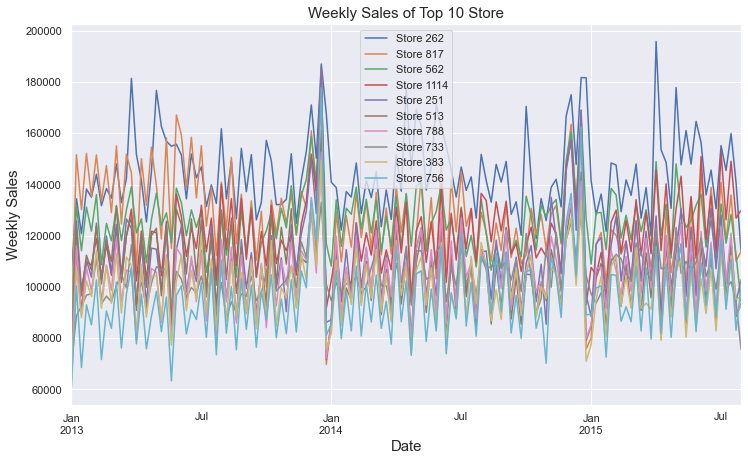

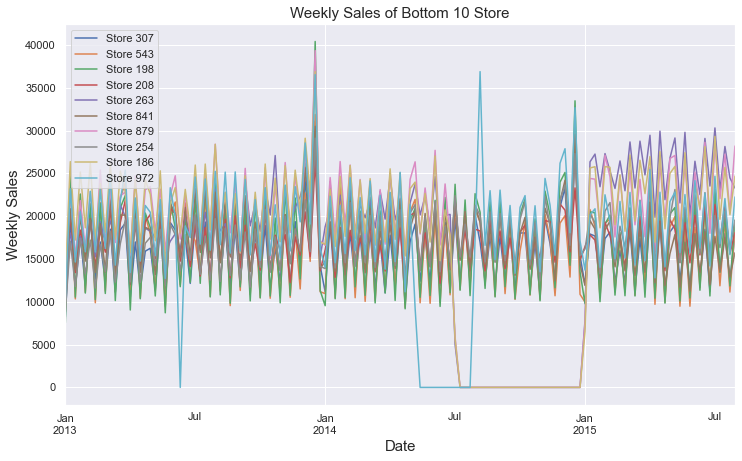

In [68]:
sales_by_store.topN_weekly_salesplot(10)
sales_by_store.bottomN_weekly_salesplot(10)

## Conclusion 1: we can see peak during christmas season is common among most of stores 